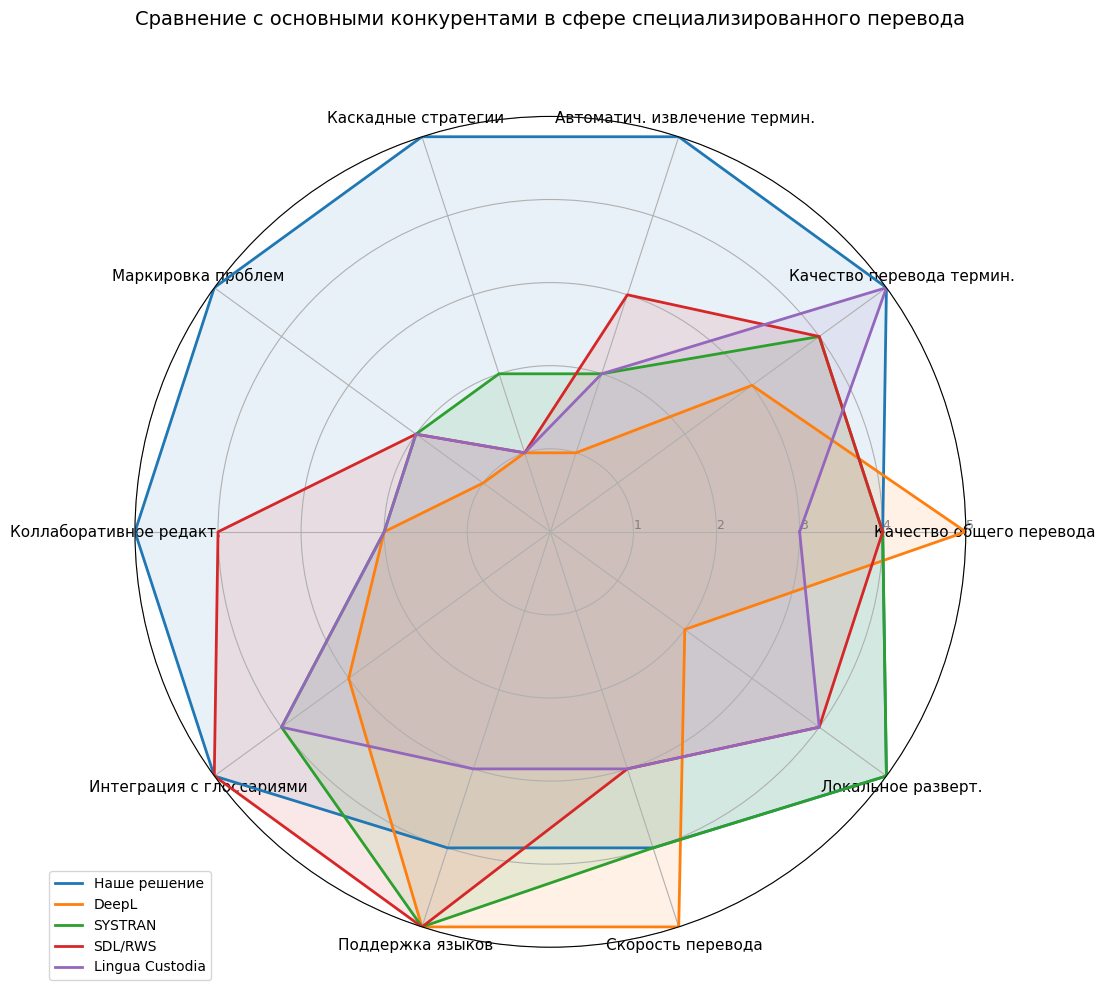

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Данные из сравнительной таблицы
features = [
    'Качество общего перевода', 
    'Качество перевода термин.', 
    'Автоматич. извлечение термин.',
    'Каскадные стратегии', 
    'Маркировка проблем',
    'Коллаборативное редакт.', 
    'Интеграция с глоссариями',
    'Поддержка языков', 
    'Скорость перевода',
    'Локальное разверт.'
]

# Рейтинги для каждого продукта
our_solution = [4, 5, 5, 5, 5, 5, 5, 4, 4, 5]
deepl = [5, 3, 1, 1, 1, 2, 3, 5, 5, 2]
systran = [4, 4, 2, 2, 2, 2, 4, 5, 4, 5]
sdl = [4, 4, 3, 1, 2, 4, 5, 5, 3, 4]
lingua = [3, 5, 2, 1, 2, 2, 4, 3, 3, 4]

# Количество характеристик
N = len(features)

# Углы для каждой характеристики
angles = np.linspace(0, 2*np.pi, N, endpoint=False)

# Замыкаем график, повторяя первую точку
angles = np.append(angles, angles[0])

# Создаем фигуру и полярную проекцию
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(polar=True))

# Добавляем метки характеристик
plt.xticks(angles[:-1], features, size=11)

# Устанавливаем лимиты оси Y
ax.set_ylim(0, 5)
plt.yticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'], color='grey', size=9)

# Добавляем линии сетки
ax.set_rlabel_position(0)
plt.grid(True)

# Названия продуктов
products = ['Наше решение', 'DeepL', 'SYSTRAN', 'SDL/RWS', 'Lingua Custodia']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Данные для графика
data = [our_solution, deepl, systran, sdl, lingua]

# Замыкаем данные для каждого продукта
for i in range(len(data)):
    data[i] = np.append(data[i], data[i][0])

# Строим график для каждого продукта
for i, d in enumerate(data):
    ax.plot(angles, d, color=colors[i], linewidth=2, label=products[i])
    ax.fill(angles, d, color=colors[i], alpha=0.1)

# Добавляем легенду
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=10)

# Заголовок
plt.title('Сравнение с основными конкурентами в сфере специализированного перевода', size=14, y=1.1)

plt.tight_layout()
plt.savefig('competitor_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

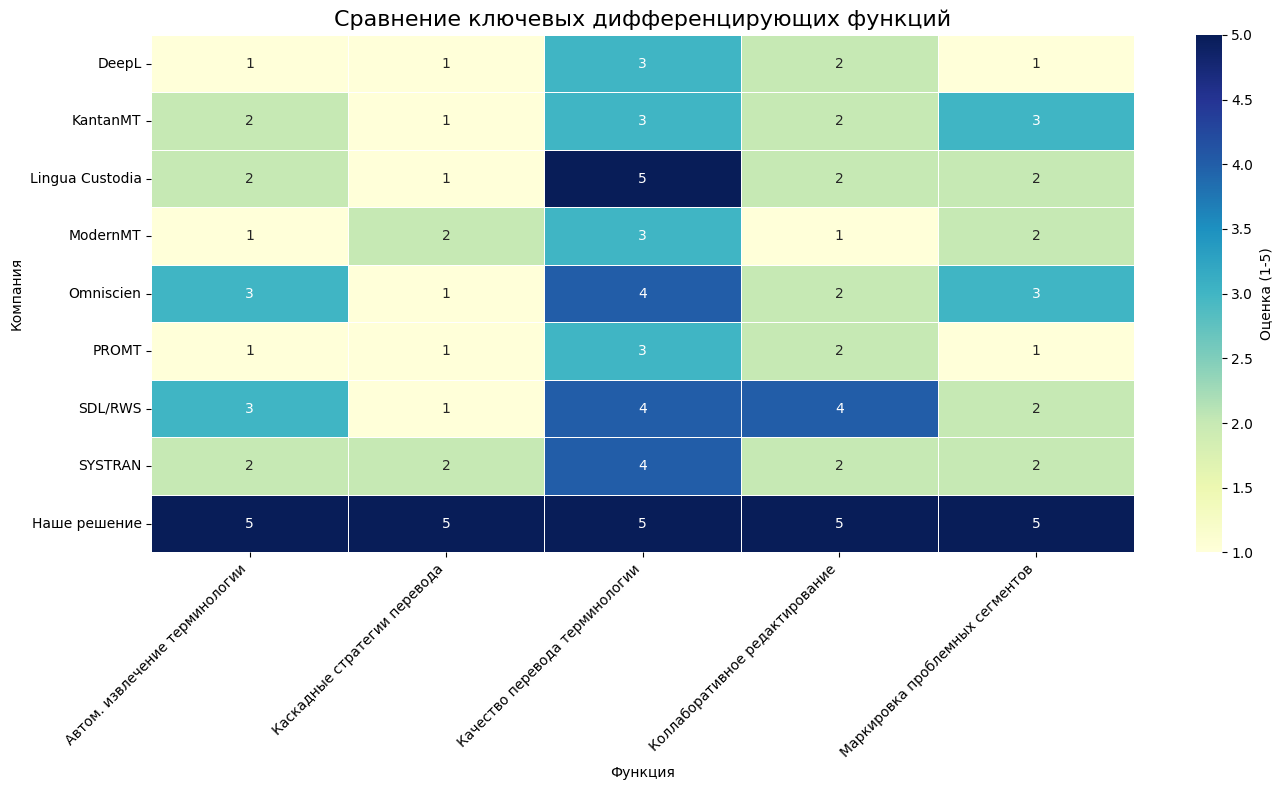

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Выбираем 5 ключевых дифференцирующих функций
key_features = [
    'Качество перевода терминологии', 
    'Автом. извлечение терминологии', 
    'Каскадные стратегии перевода',
    'Маркировка проблемных сегментов',
    'Коллаборативное редактирование'
]

# Полный список функций для индексации
features = [
    'Качество общего перевода', 
    'Качество перевода терминологии', 
    'Автом. извлечение терминологии',
    'Каскадные стратегии перевода', 
    'Маркировка проблемных сегментов',
    'Коллаборативное редактирование', 
    'Интеграция с глоссариями',
    'Поддержка языков', 
    'Скорость перевода',
    'Локальное развертывание'
]

# Индексы выбранных функций
indices = [features.index(feature) for feature in key_features]

# Рейтинги для каждого продукта
our_solution = [4, 5, 5, 5, 5, 5, 5, 4, 4, 5]
deepl = [5, 3, 1, 1, 1, 2, 3, 5, 5, 2]
systran = [4, 4, 2, 2, 2, 2, 4, 5, 4, 5]
sdl = [4, 4, 3, 1, 2, 4, 5, 5, 3, 4]
modernmt = [4, 3, 1, 2, 2, 1, 2, 3, 4, 3]
omniscien = [3, 4, 3, 1, 3, 2, 4, 4, 3, 5]
kantanmt = [3, 3, 2, 1, 3, 2, 3, 4, 3, 2]
promt = [3, 3, 1, 1, 1, 2, 3, 3, 4, 5]
lingua = [3, 5, 2, 1, 2, 2, 4, 3, 3, 4]

# Данные для графика
companies = ['Наше решение', 'DeepL', 'SYSTRAN', 'SDL/RWS', 'ModernMT', 'Omniscien', 'KantanMT', 'PROMT', 'Lingua Custodia']
all_ratings = [our_solution, deepl, systran, sdl, modernmt, omniscien, kantanmt, promt, lingua]

# Собираем данные для ключевых функций
data = []
for i, company in enumerate(companies):
    for j, idx in enumerate(indices):
        data.append({
            'Компания': company,
            'Функция': key_features[j],
            'Оценка': all_ratings[i][idx]
        })

# Создаем DataFrame из списка словарей
df = pd.DataFrame(data)

# Преобразуем данные в формат, удобный для построения тепловой карты
heatmap_data = df.pivot(index='Компания', columns='Функция', values='Оценка')

# Создаем тепловую карту
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=.5, fmt='d', cbar_kws={'label': 'Оценка (1-5)'})
plt.title('Сравнение ключевых дифференцирующих функций', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('key_features_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_21792/2729264715.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Компания', y='Средняя оценка', data=avg_df, palette='viridis')


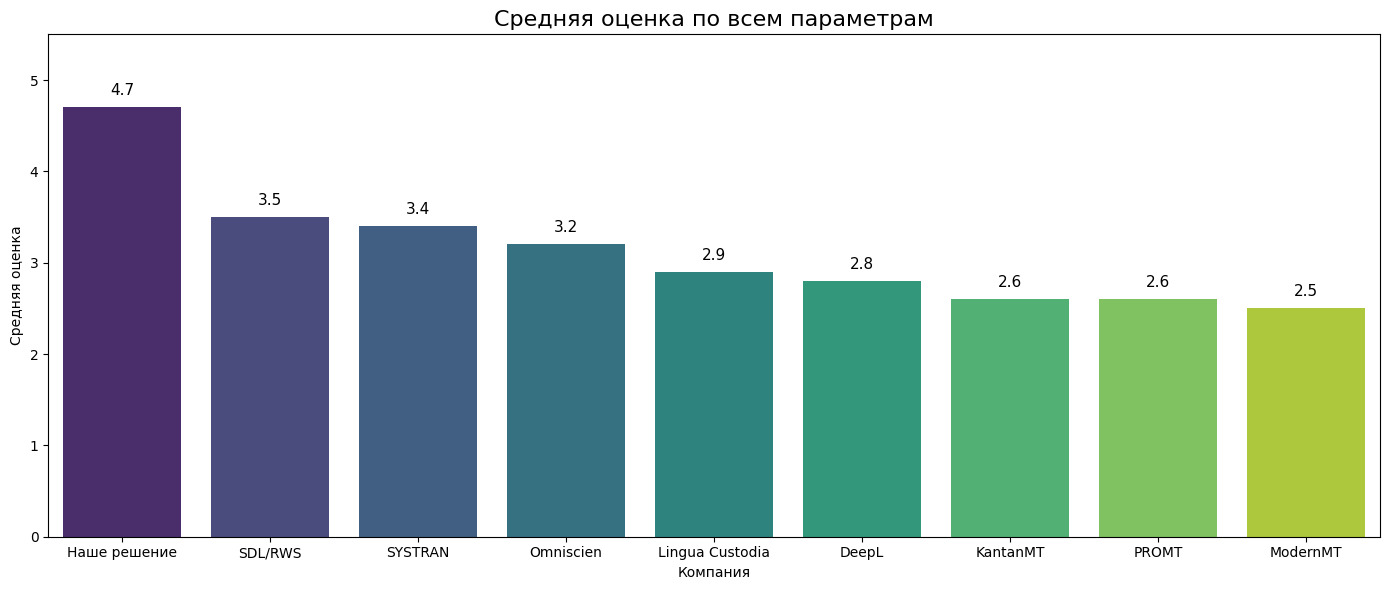

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Рейтинги для каждого продукта
our_solution = [4, 5, 5, 5, 5, 5, 5, 4, 4, 5]
deepl = [5, 3, 1, 1, 1, 2, 3, 5, 5, 2]
systran = [4, 4, 2, 2, 2, 2, 4, 5, 4, 5]
sdl = [4, 4, 3, 1, 2, 4, 5, 5, 3, 4]
modernmt = [4, 3, 1, 2, 2, 1, 2, 3, 4, 3]
omniscien = [3, 4, 3, 1, 3, 2, 4, 4, 3, 5]
kantanmt = [3, 3, 2, 1, 3, 2, 3, 4, 3, 2]
promt = [3, 3, 1, 1, 1, 2, 3, 3, 4, 5]
lingua = [3, 5, 2, 1, 2, 2, 4, 3, 3, 4]

# Данные для графика
companies = ['Наше решение', 'DeepL', 'SYSTRAN', 'SDL/RWS', 'ModernMT', 'Omniscien', 'KantanMT', 'PROMT', 'Lingua Custodia']
all_ratings = [our_solution, deepl, systran, sdl, modernmt, omniscien, kantanmt, promt, lingua]

# Создаем данные для средних оценок
avg_scores = []
for i, company in enumerate(companies):
    avg_scores.append({
        'Компания': company,
        'Средняя оценка': sum(all_ratings[i])/len(all_ratings[i])
    })

# Создаем DataFrame и сортируем по средней оценке
avg_df = pd.DataFrame(avg_scores).sort_values(by='Средняя оценка', ascending=False)

# Создаем столбчатую диаграмму
plt.figure(figsize=(14, 6))
bars = sns.barplot(x='Компания', y='Средняя оценка', data=avg_df, palette='viridis')

# Добавляем значения над столбцами
for i, bar in enumerate(bars.patches):
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        bar.get_height() + 0.1,
        f'{avg_df["Средняя оценка"].iloc[i]:.1f}',
        ha='center', va='bottom', fontsize=11
    )

# Настраиваем график
plt.title('Средняя оценка по всем параметрам', fontsize=16)
plt.ylim(0, 5.5)  # Устанавливаем верхний предел для оси Y
plt.tight_layout()
plt.savefig('average_ratings.png', dpi=300, bbox_inches='tight')
plt.show()

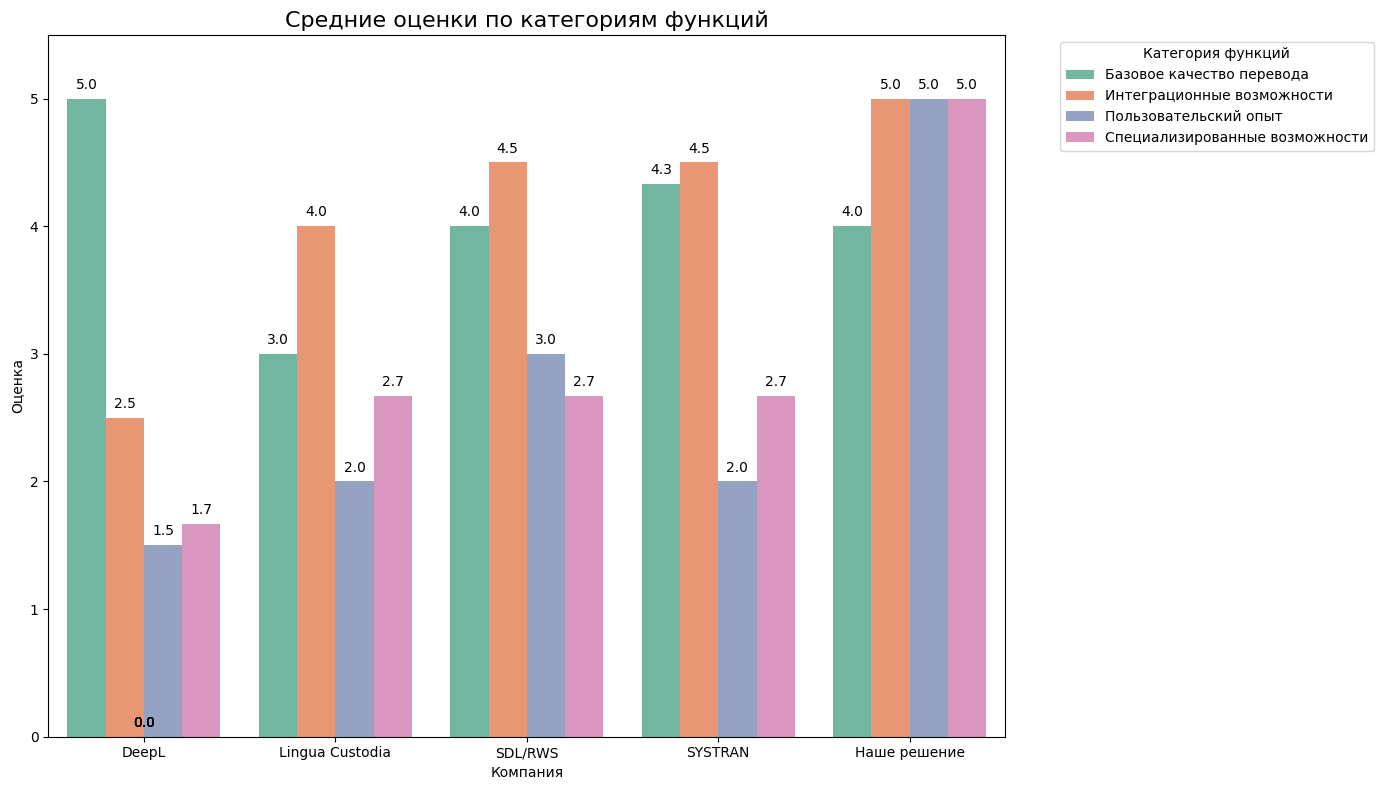

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Рейтинги для каждого продукта
our_solution = [4, 5, 5, 5, 5, 5, 5, 4, 4, 5]
deepl = [5, 3, 1, 1, 1, 2, 3, 5, 5, 2]
systran = [4, 4, 2, 2, 2, 2, 4, 5, 4, 5]
sdl = [4, 4, 3, 1, 2, 4, 5, 5, 3, 4]
lingua = [3, 5, 2, 1, 2, 2, 4, 3, 3, 4]

# Категории функций
categories = [
    "Базовое качество перевода",          # 0: Качество общего перевода
    "Специализированные возможности",     # 1: Качество перевода терминологии
    "Специализированные возможности",     # 2: Автоматическое извлечение терминологии
    "Специализированные возможности",     # 3: Каскадные стратегии перевода
    "Пользовательский опыт",              # 4: Маркировка проблемных сегментов
    "Пользовательский опыт",              # 5: Коллаборативное редактирование
    "Интеграционные возможности",         # 6: Интеграция с глоссариями
    "Базовое качество перевода",          # 7: Поддержка языков
    "Базовое качество перевода",          # 8: Скорость перевода
    "Интеграционные возможности"          # 9: Локальное развертывание
]

# Функции
features = [
    'Качество общего перевода', 
    'Качество перевода терминологии', 
    'Автоматическое извлечение терминологии',
    'Каскадные стратегии перевода', 
    'Маркировка проблемных сегментов',
    'Коллаборативное редактирование', 
    'Интеграция с глоссариями',
    'Поддержка языков', 
    'Скорость перевода',
    'Локальное развертывание'
]

# Компании
companies = ['Наше решение', 'DeepL', 'SYSTRAN', 'SDL/RWS', 'Lingua Custodia']
all_ratings = [our_solution, deepl, systran, sdl, lingua]

# Создаем данные для графика
data = []
for i, company in enumerate(companies):
    for j, feature in enumerate(features):
        data.append({
            'Компания': company,
            'Функция': feature,
            'Категория': categories[j],
            'Оценка': all_ratings[i][j]
        })

# Создаем DataFrame
df = pd.DataFrame(data)

# Расчет средних значений по категориям для каждой компании
category_means = df.groupby(['Компания', 'Категория'])['Оценка'].mean().reset_index()

# Создаем фигуру
plt.figure(figsize=(14, 8))

# Создаем сгруппированную столбчатую диаграмму
barplot = sns.barplot(x='Компания', y='Оценка', hue='Категория', data=category_means, palette='Set2')

# Настраиваем график
plt.title('Средние оценки по категориям функций', fontsize=16)
plt.ylim(0, 5.5)
plt.legend(title='Категория функций', bbox_to_anchor=(1.05, 1), loc='upper left')

# Добавляем значения над столбцами
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'bottom',
                     xytext = (0, 5), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.savefig('category_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

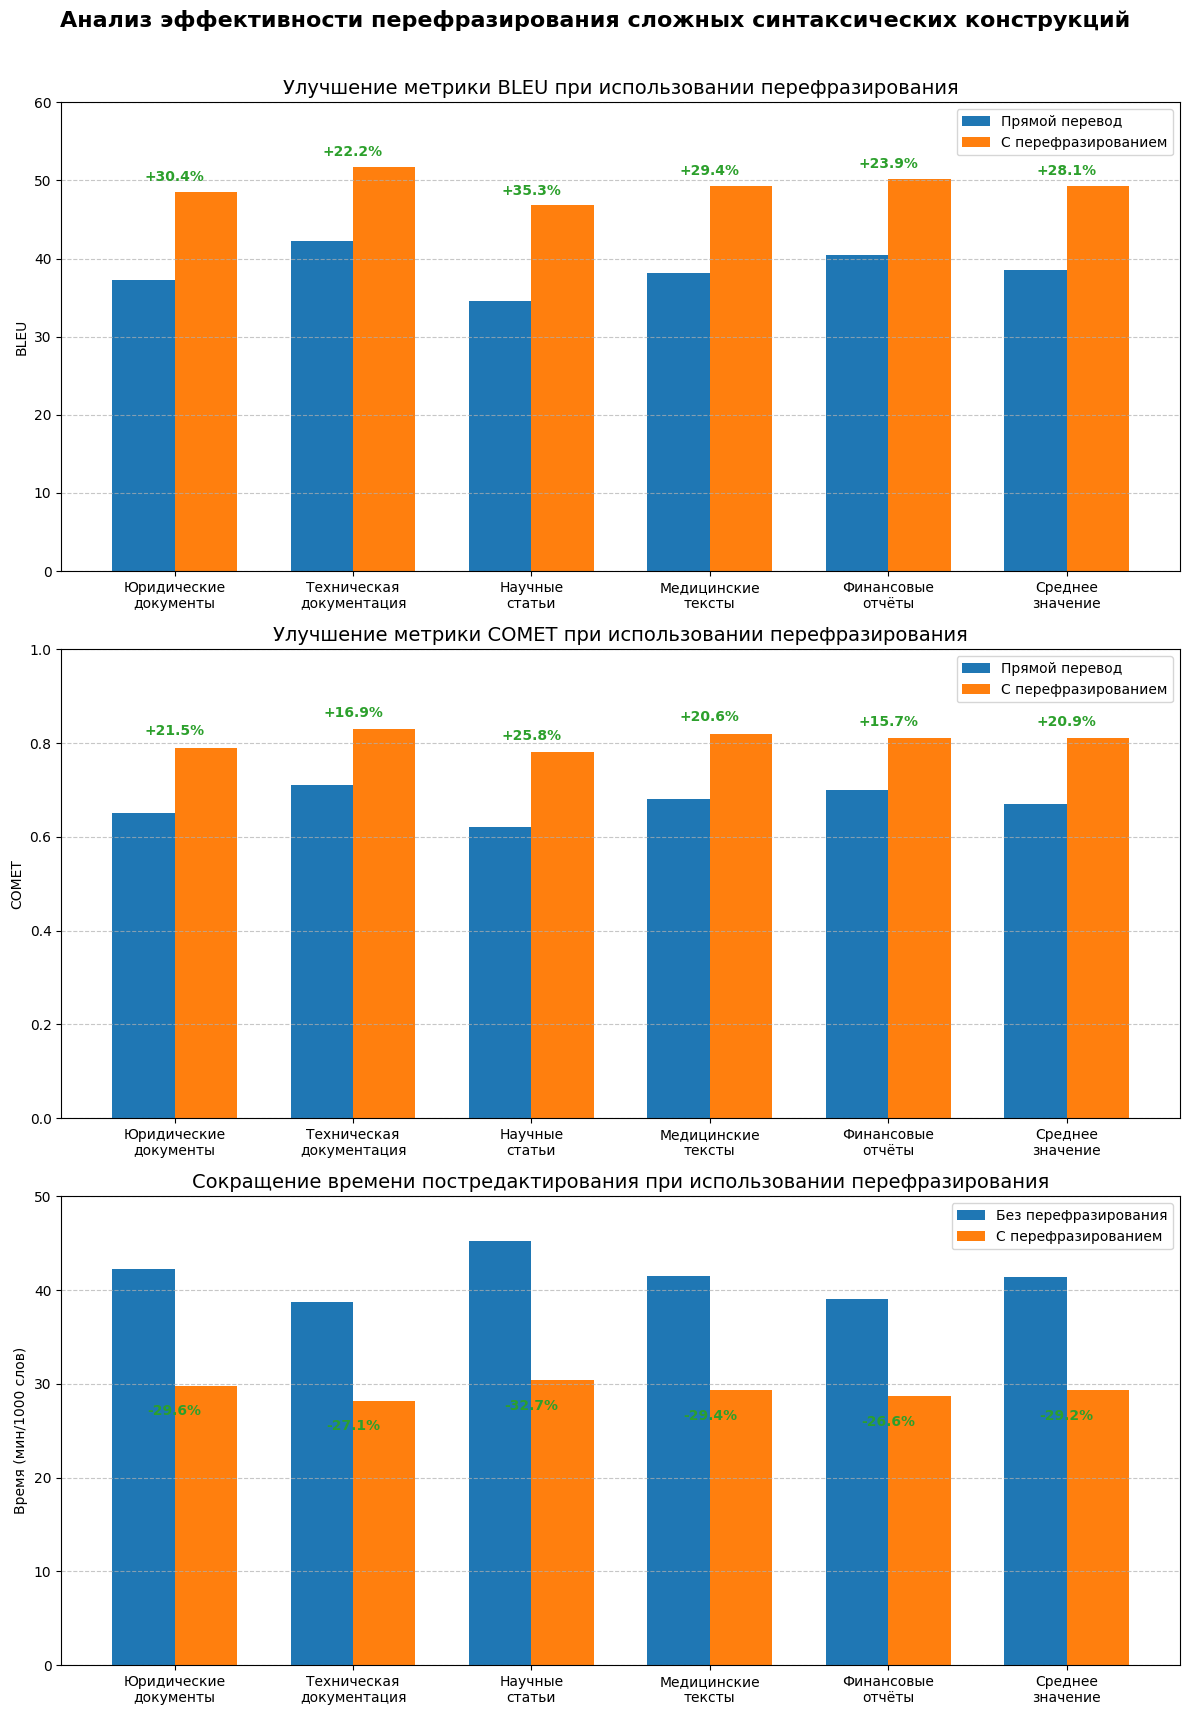

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Данные из таблицы 2.7.4.1
domains = ['Юридические\nдокументы', 'Техническая\nдокументация', 'Научные\nстатьи', 
           'Медицинские\nтексты', 'Финансовые\nотчёты', 'Среднее\nзначение']

bleu_direct = [37.2, 42.3, 34.6, 38.1, 40.5, 38.5]
bleu_with_rephrasing = [48.5, 51.7, 46.8, 49.3, 50.2, 49.3]
bleu_improvement = [30.4, 22.2, 35.3, 29.4, 23.9, 28.1]

comet_direct = [0.65, 0.71, 0.62, 0.68, 0.70, 0.67]
comet_with_rephrasing = [0.79, 0.83, 0.78, 0.82, 0.81, 0.81]
comet_improvement = [21.5, 16.9, 25.8, 20.6, 15.7, 20.9]

# Данные из таблицы 2.7.4.2
editing_time_direct = [42.3, 38.7, 45.2, 41.5, 39.1, 41.4]
editing_time_with_rephrasing = [29.8, 28.2, 30.4, 29.3, 28.7, 29.3]
time_reduction = [29.6, 27.1, 32.7, 29.4, 26.6, 29.2]

# Создание фигуры и осей для графиков
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Анализ эффективности перефразирования сложных синтаксических конструкций', 
             fontsize=16, fontweight='bold')

# Настройка стиля
plt.rcParams['font.family'] = 'DejaVu Sans'
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bar_width = 0.35
index = np.arange(len(domains))

# 1. График BLEU
ax1.set_title('Улучшение метрики BLEU при использовании перефразирования', fontsize=14)
bar1 = ax1.bar(index - bar_width/2, bleu_direct, bar_width, label='Прямой перевод', color=colors[0])
bar2 = ax1.bar(index + bar_width/2, bleu_with_rephrasing, bar_width, label='С перефразированием', color=colors[1])

# Добавление процента улучшения
for i, v in enumerate(bleu_improvement):
    ax1.text(i, max(bleu_direct[i], bleu_with_rephrasing[i]) + 1, f'+{v}%', 
             ha='center', va='bottom', fontweight='bold', color=colors[2])

ax1.set_xticks(index)
ax1.set_xticklabels(domains)
ax1.set_ylabel('BLEU')
ax1.set_ylim(0, 60)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 2. График COMET
ax2.set_title('Улучшение метрики COMET при использовании перефразирования', fontsize=14)
bar3 = ax2.bar(index - bar_width/2, comet_direct, bar_width, label='Прямой перевод', color=colors[0])
bar4 = ax2.bar(index + bar_width/2, comet_with_rephrasing, bar_width, label='С перефразированием', color=colors[1])

# Добавление процента улучшения
for i, v in enumerate(comet_improvement):
    ax2.text(i, max(comet_direct[i], comet_with_rephrasing[i]) + 0.02, f'+{v}%', 
             ha='center', va='bottom', fontweight='bold', color=colors[2])

ax2.set_xticks(index)
ax2.set_xticklabels(domains)
ax2.set_ylabel('COMET')
ax2.set_ylim(0, 1.0)
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# 3. График времени постредактирования
ax3.set_title('Сокращение времени постредактирования при использовании перефразирования', fontsize=14)
bar5 = ax3.bar(index - bar_width/2, editing_time_direct, bar_width, 
               label='Без перефразирования', color=colors[0])
bar6 = ax3.bar(index + bar_width/2, editing_time_with_rephrasing, bar_width, 
               label='С перефразированием', color=colors[1])

# Добавление процента сокращения
for i, v in enumerate(time_reduction):
    ax3.text(i, min(editing_time_direct[i], editing_time_with_rephrasing[i]) - 2, f'-{v}%', 
             ha='center', va='top', fontweight='bold', color=colors[2])

ax3.set_xticks(index)
ax3.set_xticklabels(domains)
ax3.set_ylabel('Время (мин/1000 слов)')
ax3.set_ylim(0, 50)
ax3.legend()
ax3.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('efficiency_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

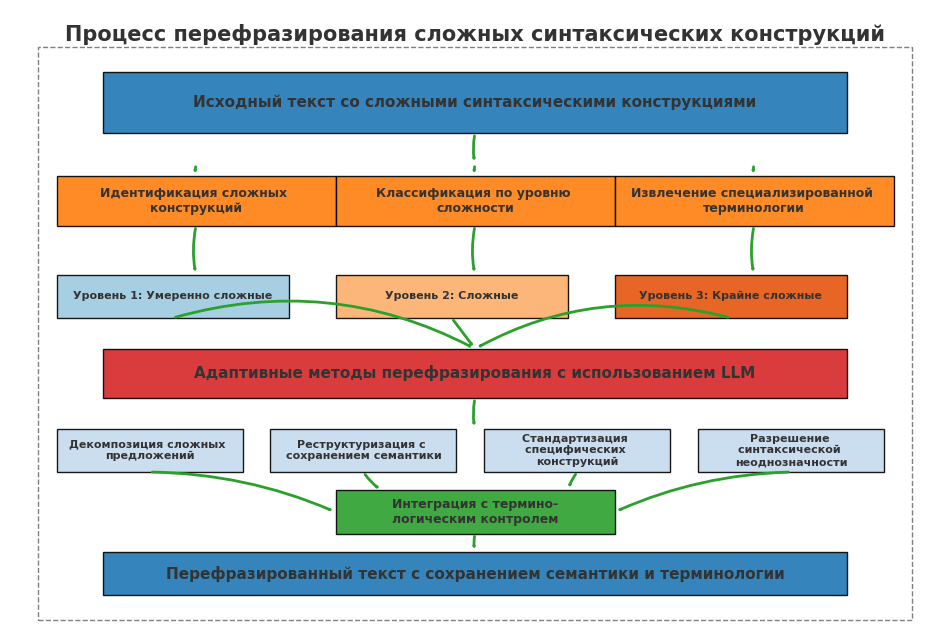

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'DejaVu Sans'

# Создаем фигуру
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('#f9f9f9')

# Создаем диаграмму процесса перефразирования
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Определяем цвета
main_color = '#1f77b4'
secondary_color = '#ff7f0e'
accent_color = '#2ca02c'
highlight_color = '#d62728'
text_color = '#333333'

# Функция для создания блока с текстом
def create_text_box(x, y, width, height, text, color, alpha=0.9, fontsize=10, text_color=text_color):
    rect = plt.Rectangle((x, y), width, height, facecolor=color, alpha=alpha, edgecolor='black', linewidth=1)
    ax.add_patch(rect)
    ax.text(x + width/2, y + height/2, text, ha='center', va='center', fontweight='bold', 
            color=text_color, wrap=True, fontsize=fontsize)

# Функция для создания стрелки
def create_arrow(start, end, color=accent_color, style='arc3,rad=0.1', width=2):
    arrow = FancyArrowPatch(start, end, connectionstyle=style, 
                           arrowstyle='->', color=color, linewidth=width)
    ax.add_patch(arrow)

# Заголовок
ax.text(5, 9.5, 'Процесс перефразирования сложных синтаксических конструкций', 
        ha='center', fontsize=15, fontweight='bold', color=text_color)

# Блок 1: Исходный текст
create_text_box(1, 8, 8, 1, 'Исходный текст со сложными синтаксическими конструкциями', main_color, fontsize=11)

# Блок 2: Идентификация
create_text_box(0.5, 6.5, 3, 0.8, 'Идентификация сложных \nконструкций', secondary_color, fontsize=9)

# Блок 3: Классификация
create_text_box(3.5, 6.5, 3, 0.8, 'Классификация по уровню \nсложности', secondary_color, fontsize=9)

# Блок 4: Извлечение терминов
create_text_box(6.5, 6.5, 3, 0.8, 'Извлечение специализированной \nтерминологии', secondary_color, fontsize=9)

# Блоки уровней сложности
create_text_box(0.5, 5, 2.5, 0.7, 'Уровень 1: Умеренно сложные', '#9ecae1', fontsize=8)
create_text_box(3.5, 5, 2.5, 0.7, 'Уровень 2: Сложные', '#fdae6b', fontsize=8)
create_text_box(6.5, 5, 2.5, 0.7, 'Уровень 3: Крайне сложные', '#e6550d', fontsize=8)

# Блок адаптивных методов перефразирования
create_text_box(1, 3.7, 8, 0.8, 'Адаптивные методы перефразирования с использованием LLM', highlight_color, fontsize=11)

# Методы перефразирования
create_text_box(0.5, 2.5, 2, 0.7, 'Декомпозиция сложных \nпредложений', '#c6dbef', fontsize=8)
create_text_box(2.8, 2.5, 2, 0.7, 'Реструктуризация с \nсохранением семантики', '#c6dbef', fontsize=8)
create_text_box(5.1, 2.5, 2, 0.7, 'Стандартизация \nспецифических \nконструкций', '#c6dbef', fontsize=8)
create_text_box(7.4, 2.5, 2, 0.7, 'Разрешение \nсинтаксической \nнеоднозначности', '#c6dbef', fontsize=8)

# Терминологический контроль
create_text_box(3.5, 1.5, 3, 0.7, 'Интеграция с термино-\nлогическим контролем', accent_color, fontsize=9)

# Результат перефразирования
create_text_box(1, 0.5, 8, 0.7, 'Перефразированный текст с сохранением семантики и терминологии', main_color, fontsize=11)

# Стрелки
create_arrow((5, 8), (5, 7.5))

# Стрелки к блокам идентификации, классификации и извлечения терминов
create_arrow((2, 7.5), (2, 7.3))
create_arrow((5, 7.5), (5, 7.3))
create_arrow((8, 7.5), (8, 7.3))

# Стрелки к уровням сложности
create_arrow((2, 6.5), (2, 5.7))
create_arrow((5, 6.5), (5, 5.7))
create_arrow((8, 6.5), (8, 5.7))

# Стрелки от уровней сложности к адаптивным методам
create_arrow((1.75, 5), (5, 4.5), style='arc3,rad=-0.2')
create_arrow((4.75, 5), (5, 4.5), style='arc3,rad=0')
create_arrow((7.75, 5), (5, 4.5), style='arc3,rad=0.2')

# Стрелка к методам перефразирования
create_arrow((5, 3.7), (5, 3.2))

# Стрелки от методов к терминологическому контролю
create_arrow((1.5, 2.5), (3.5, 1.85), style='arc3,rad=-0.1')
create_arrow((3.8, 2.5), (4, 2.2))
create_arrow((6.1, 2.5), (6, 2.2))
create_arrow((8.4, 2.5), (6.5, 1.85), style='arc3,rad=0.1')

# Стрелка к результату
create_arrow((5, 1.5), (5, 1.2))

# Добавляем рамку для оценки результатов
rect = plt.Rectangle((0.3, 0.1), 9.4, 9.3, fill=False, edgecolor='gray', linestyle='--', linewidth=1)
ax.add_patch(rect)

# Сохраняем изображение
plt.savefig('rephrasing_process.png', dpi=300, bbox_inches='tight')
plt.show()

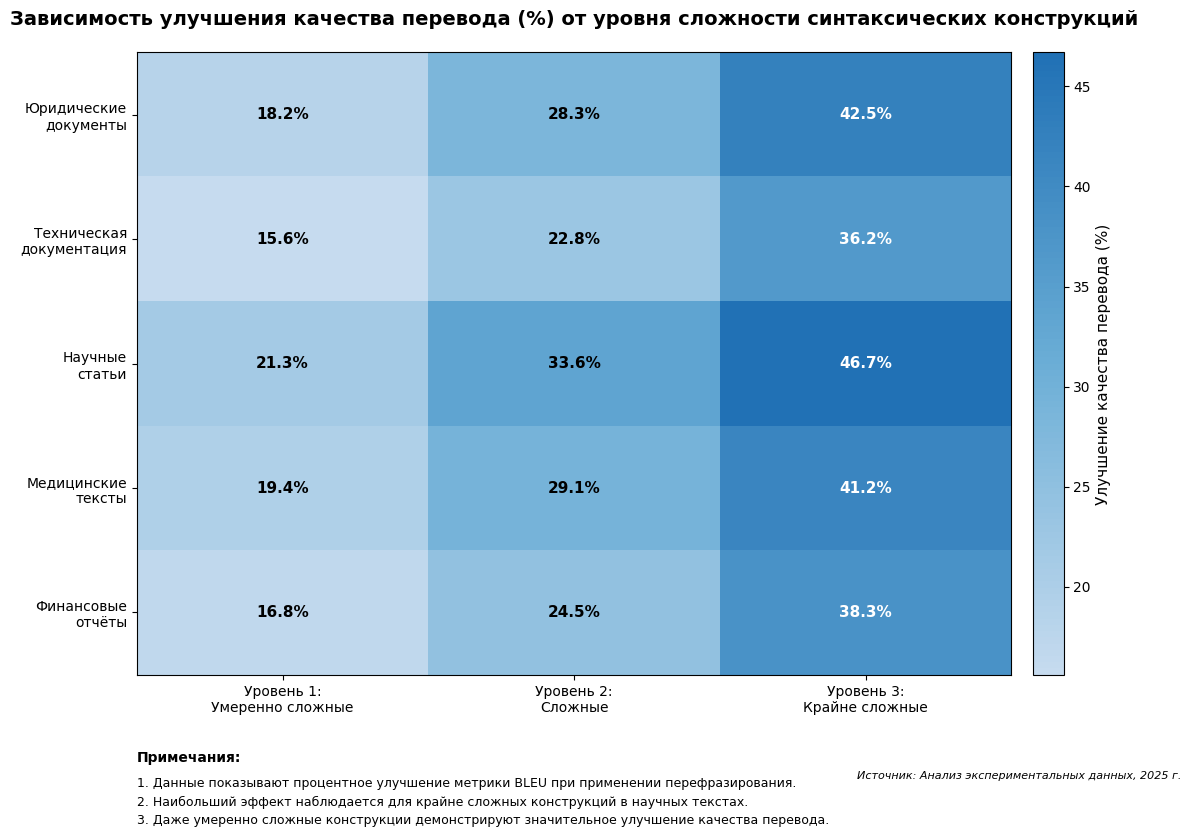

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['font.family'] = 'DejaVu Sans'

# Создаем данные для тепловой карты
# Процент улучшения качества перевода в зависимости от уровня сложности и предметной области
data = np.array([
    [18.2, 28.3, 42.5],  # Юридические документы (уровни 1, 2, 3)
    [15.6, 22.8, 36.2],  # Техническая документация
    [21.3, 33.6, 46.7],  # Научные статьи
    [19.4, 29.1, 41.2],  # Медицинские тексты
    [16.8, 24.5, 38.3],  # Финансовые отчёты
])

# Создаем фигуру
fig, ax = plt.subplots(figsize=(12, 8))

# Настраиваем кастомную цветовую карту для лучшей визуализации
colors = ['#c6dbef', '#6baed6', '#2171b5']
cmap = LinearSegmentedColormap.from_list('custom_blues', colors, N=100)

# Создаем тепловую карту
im = ax.imshow(data, cmap=cmap, aspect='auto')

# Добавляем заголовок
ax.set_title('Зависимость улучшения качества перевода (%) от уровня сложности синтаксических конструкций', 
             fontsize=14, fontweight='bold', pad=20)

# Настраиваем оси
predmet_oblasti = ['Юридические\nдокументы', 'Техническая\nдокументация', 
                 'Научные\nстатьи', 'Медицинские\nтексты', 'Финансовые\nотчёты']
complexity_levels = ['Уровень 1:\nУмеренно сложные', 'Уровень 2:\nСложные', 'Уровень 3:\nКрайне сложные']

ax.set_yticks(np.arange(len(predmet_oblasti)))
ax.set_yticklabels(predmet_oblasti, fontsize=10)
ax.set_xticks(np.arange(len(complexity_levels)))
ax.set_xticklabels(complexity_levels, fontsize=10)

# Добавляем числовые значения в ячейки
for i in range(len(predmet_oblasti)):
    for j in range(len(complexity_levels)):
        text = ax.text(j, i, f"{data[i, j]}%", ha="center", va="center", 
                       color="black" if data[i, j] < 35 else "white", fontweight='bold', fontsize=11)

# Добавляем colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Улучшение качества перевода (%)', fontsize=11)

# Добавляем аннотации
ax.text(-0.5, 5.2, "Примечания:", fontsize=10, fontweight='bold')
ax.text(-0.5, 5.4, "1. Данные показывают процентное улучшение метрики BLEU при применении перефразирования.", 
        fontsize=9)
ax.text(-0.5, 5.55, "2. Наибольший эффект наблюдается для крайне сложных конструкций в научных текстах.", 
        fontsize=9)
ax.text(-0.5, 5.7, "3. Даже умеренно сложные конструкции демонстрируют значительное улучшение качества перевода.", 
        fontsize=9)

# Добавляем метаданные исследования
metadata = "Источник: Анализ экспериментальных данных, 2025 г."
plt.figtext(0.98, 0.02, metadata, ha='right', fontsize=8, style='italic')

# Настраиваем границы и отступы
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

# Сохраняем изображение
plt.savefig('complexity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

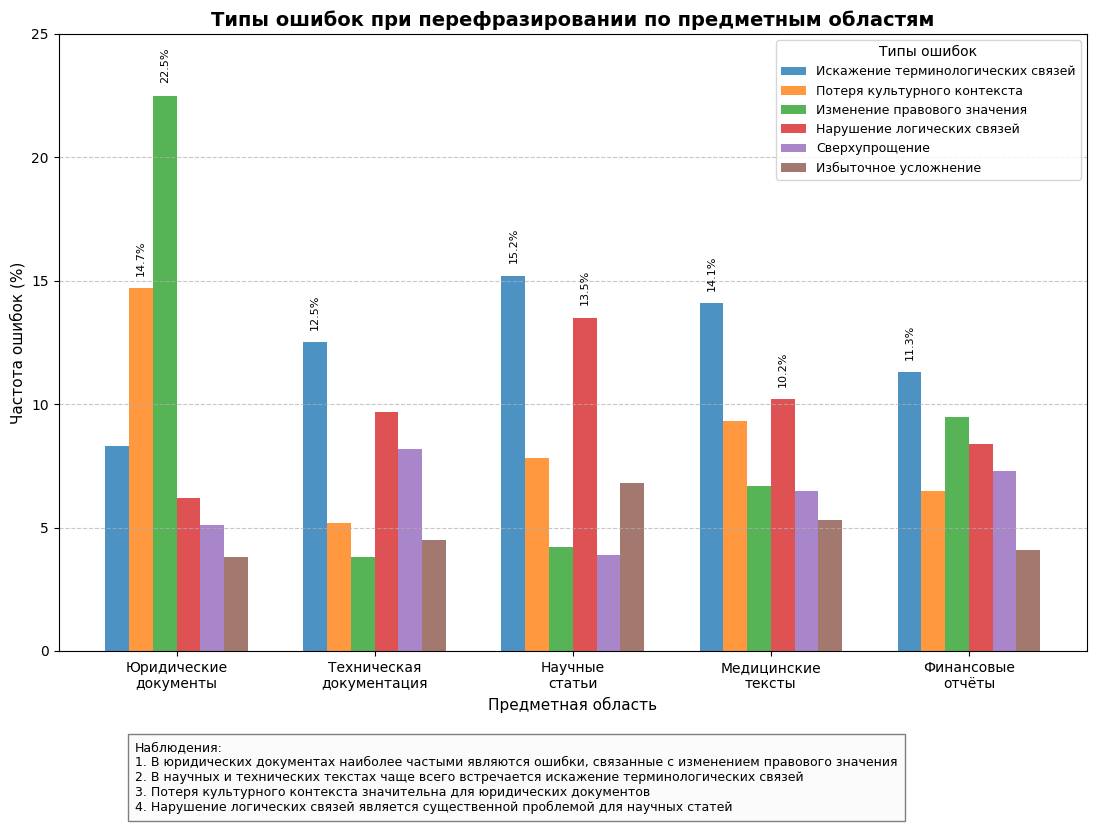

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Sans'

# Создаем данные для визуализации типов ошибок при перефразировании
error_types = [
    'Искажение терминологических связей', 
    'Потеря культурного контекста',
    'Изменение правового значения',
    'Нарушение логических связей',
    'Сверхупрощение',
    'Избыточное усложнение'
]

# Частота ошибок по предметным областям (в процентах)
error_data = np.array([
    [8.3, 14.7, 22.5, 6.2, 5.1, 3.8],  # Юридические документы
    [12.5, 5.2, 3.8, 9.7, 8.2, 4.5],   # Техническая документация
    [15.2, 7.8, 4.2, 13.5, 3.9, 6.8],  # Научные статьи
    [14.1, 9.3, 6.7, 10.2, 6.5, 5.3],  # Медицинские тексты
    [11.3, 6.5, 9.5, 8.4, 7.3, 4.1]    # Финансовые отчёты
])

# Создаем фигуру
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('white')

# Названия предметных областей
domains = ['Юридические\nдокументы', 'Техническая\nдокументация', 'Научные\nстатьи', 
           'Медицинские\nтексты', 'Финансовые\nотчёты']

# Создаем группированную столбчатую диаграмму
x = np.arange(len(domains))  # координаты категорий на оси x
width = 0.12  # ширина столбцов

# Создаем столбцы для каждого типа ошибок
for i in range(len(error_types)):
    offset = width * (i - len(error_types)/2 + 0.5)
    bars = ax.bar(x + offset, error_data[:, i], width, 
                  label=error_types[i],
                  color=plt.cm.tab10(i), alpha=0.8)
    
    # Добавляем значения над столбцами (только для значений выше 10%)
    for j, bar in enumerate(bars):
        if error_data[j, i] > 10:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{error_data[j, i]}%', ha='center', va='bottom', fontsize=8, rotation=90)

# Настраиваем оси
ax.set_title('Типы ошибок при перефразировании по предметным областям', fontsize=14, fontweight='bold')
ax.set_xlabel('Предметная область', fontsize=11)
ax.set_ylabel('Частота ошибок (%)', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(domains, fontsize=10)
ax.set_ylim(0, 25)

# Добавляем легенду
ax.legend(title='Типы ошибок', loc='upper right', bbox_to_anchor=(1, 1), fontsize=9)

# Добавляем сетку для лучшей читаемости
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем аннотацию с описанием
annotation = (
    "Наблюдения:\n"
    "1. В юридических документах наиболее частыми являются ошибки, связанные с изменением правового значения\n"
    "2. В научных и технических текстах чаще всего встречается искажение терминологических связей\n"
    "3. Потеря культурного контекста значительна для юридических документов\n"
    "4. Нарушение логических связей является существенной проблемой для научных статей"
)

plt.figtext(0.1, -0.02, annotation, ha='left', fontsize=9, bbox=dict(facecolor='#f9f9f9', alpha=0.5, pad=5))

# Настраиваем макет
plt.tight_layout()
plt.subplots_adjust(right=0.78, bottom=0.18)

# Сохраняем изображение
plt.savefig('error_types_analysis.png', dpi=300, bbox_inches='tight')
plt.show()